# PREDICTING CAT AND DOG IMAGES
# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('datasets/dogs_cats/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('datasets/dogs_cats/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [4]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [12]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 136s 534ms/step - loss: 0.6875 - accuracy: 0.5544 - val_loss: 0.6561 - val_accuracy: 0.6185
Epoch 2/25
250/250 [==============================] - 78s 312ms/step - loss: 0.6390 - accuracy: 0.6352 - val_loss: 0.5860 - val_accuracy: 0.7020
Epoch 3/25
250/250 [==============================] - 36s 143ms/step - loss: 0.5926 - accuracy: 0.6880 - val_loss: 0.5547 - val_accuracy: 0.7365
Epoch 4/25
250/250 [==============================] - 37s 148ms/step - loss: 0.5489 - accuracy: 0.7166 - val_loss: 0.5083 - val_accuracy: 0.7565
Epoch 5/25
250/250 [==============================] - 37s 147ms/step - loss: 0.5151 - accuracy: 0.7416 - val_loss: 0.5025 - val_accuracy: 0.7640
Epoch 6/25
250/250 [==============================] - 38s 152ms/step - loss: 0.4914 - accuracy: 0.7641 - val_loss: 0.5063 - val_accuracy: 0.7605
Epoch 7/25
250/250 [==============================] - 38s 151ms/step - loss: 0.4629 - accuracy: 0.7778 - val_loss: 0.4781 - val_a

## Part 4 - Making a single prediction

In [28]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('datasets/dogs_cats/single_prediction/cat_dog20.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction ='dog'
else:
  prediction ='cat'

1/1 [==============================] - 0s 40ms/step


In [29]:
print(prediction)

dog


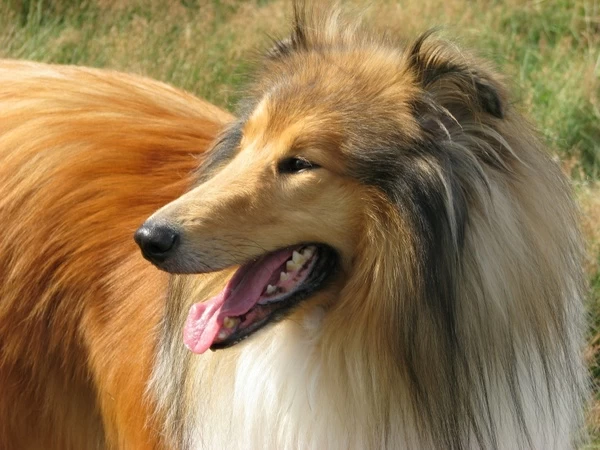

In [30]:
from IPython.display import Image
Image(filename='datasets/dogs_cats/single_prediction/cat_dog20.jpg') 